# Midterm Presentation: Oxnard and Sites of Toxic Releases

As Antonia and I continue to explore toxic facilities within Oxnard and Malibu we have shifted our methods and goals. Initially inspired by UCLA's Toxic Tides project and focus on enviromental justice, we are now taking a closer look at the EPA's TRI (toxic release inventory) that gives us data on sites of toxic releases within Calfornia. For the purpose of our research we are taking a closer look at Oxnard (a predominantely Latinx community) and the greater Los Angeles area.  

Not only does the TRI site give us meaningful data, it also gives us insight and reseach into the impacts of toxic releases. A "release" is a an exposure of a chemical means that it is emitted to the air or water, or placed in some type of land disposal. TRI tracks the management of certain toxic chemicals that may pose a threat to human health and the environment. U.S. facilities in different industry sectors must report annually how much of each chemical is released to the environment. In general, chemicals covered by the TRI Program are those that may cause Cancer or other chronic human health effects, significant adverse acute human health effects and significant adverse environmental effects.

Antonia and I are beginning to see what these trends look like on a smaller spatial scale, looking at individual cities and attempting to use an enviromental justice framework that observes the communities being diproportionately affected. 

*Does the socio-economic demographics of an area correlate with the disproportionate distribution of toxic facility waste, especially in identified disadvantaged communities, that are environmental injustice concerns?*


## Sources/Data
- EnviroStor: https://www.envirostor.dtsc.ca.gov/public/map/?myaddress=malibu
     - Will use to identify the amount and location of toxic facilities in each identified city for comparison
- Toxic Tides: https://sites.google.com/berkeley.edu/toxictides/case-studies?authuser=0
     - Will use to investigate severity of toxic sites and environmental injustice within polluted cities.
- Census Data: https://www.census.gov/quickfacts/fact/table/lagunabeachcitycalifornia,richmondcitycalifornia,oxnardcitycalifornia,malibucitycalifornia/PST045221
    - Will use to compare cities by demographics such as population size, racial make-up, median household makeup and poverty rate.
- EPA Toxic Release Facilities: (https://www.epa.gov/toxics-release-inventory-tri-program)
  -Will use to locate and identify the facilities, including their name, address, sector type and amount of releases in weight. 

In [1]:
#general data wrangling tasks
import pandas as pd

#read and visualize spatial data
import geopandas as gpd

#providing basemaps
import contextily as ctx

#give power to plots
import matplotlib.pyplot as plt

# for interactive plots
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Plot Map of Toxic Release Facilities

In [2]:
#name dataset as pd and read/show dataset
dfox=pd.read_csv('updatedoxnard_trisummary2020 - Sheet1-5.csv')

In [3]:
# convert df to gdf
gdfox = gpd.GeoDataFrame(dfox, crs='epsg:4326', geometry=gpd.points_from_xy(dfox.Longitude, dfox.Latitude)) 
#geometry put the longitude and latitide points together in new column as object types
gdfox

Longitude   Latitude                                      Name  \
0 -119.183020  34.140350                       New-Indy Oxnard LLC   
1 -119.168445  34.141707           Aluminum Precision Products INC   
2 -119.168110  34.196130                        Cemex Oxnard Plant   
3 -119.147180  34.198100                      Parker Hannifin Corp   
4 -119.130352  34.205928                      PTI Technologies Inc   
5 -119.140427  34.209468     The Procter & Gamble Paper Product CO   
6 -119.163291  34.249140  Southern Counties Oil CO LP DBA SC Fuels   
7 -119.129346  34.199354       Associated Ready Mixed Concrete Inc   
8 -119.143053  34.270536                  Vulcan Materials-Saticoy   

                                        Address              Industry Sector  \
0           5936 Perkins Road, Oxnard, CA 93033                        Paper   
1      1001 MC Wane Bouvelard, Oxnard, CA 93033            Fabricated Metals   
2             548 Diaz Avenue, Oxnard, CA 93030  Nonmetallic Mineral Product   
3            2340 Eastman Ave, Oxnard, CA 93030                    Machinery   
4   501 N Del Norte Boulevard, Oxnard, CA 93030     Transportation Equipment   
5           800 N Rice Avenue, Oxnard, CA 93030                        Paper   
6   3815 East Vineyard Avenue, Oxnard, CA 93036     Petroleum Bulk Terminals   
7  392 S. Del Norte Boulevard, Oxnard, CA 93030  Nonmetallic Mineral Product   
8        6029 Vineyard Avenue, Oxnard, CA 93030                    Petroleum   

    Releases (lb)  Releases (lb) Mean                     geometry  
0  10,001-100,000             55000.5  POINT (-119.18302 34.14035)  
1      101-10,000              5050.5  POINT (-119.16845 34.14171)  
2            0.00                 0.0  POINT (-119.16811 34.19613)  
3  10,001-100,000             55000.5  POINT (-119.14718 34.19810)  
4      101-10,000              5050.5  POINT (-119.13035 34.20593)  
5      101-10,000              5050.5  POINT (-119.14043 34.20947)  
6      101-10,000              5050.5  POINT (-119.16329 34.24914)  
7            0.00                 0.0  POINT (-119.12935 34.19935)  
8          >0-100                50.0  POINT (-119.14305 34.27054)

Text(0.5, 1.0, 'Plot of Oxnard, CA TRI Facilities in 2020')

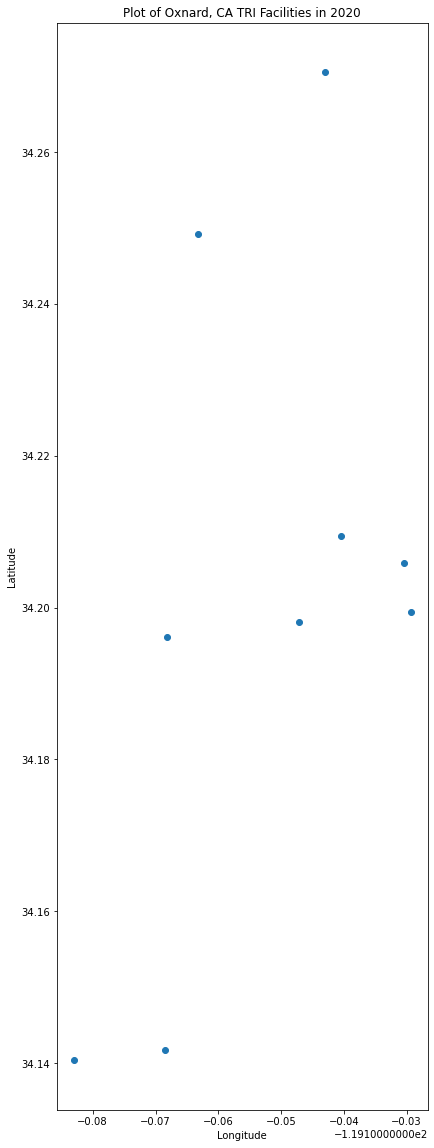

In [4]:
gdfox.plot(figsize=(30, 20))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Plot of Oxnard, CA TRI Facilities in 2020')

## Toxic Releases in Oxnard, categorized by Industry Sector

In [5]:
ox_toxic = gpd.read_file("oxnard_toxic.csv")
#using a shortened data set that inccludes just Oxnard locations we upload our data of Oxnard toxic releases.

In [6]:
ox_toxic['Latitude'] = ox_toxic['Latitude'].astype(float)
ox_toxic['Longitude'] = ox_toxic['Longitude'].astype(float)

In [7]:
facility_by_sector_type_ox = ox_toxic['Industry Sector'].value_counts().reset_index()
facility_by_sector_type_ox
#We begin to produce a bar graph by calling the industry sector column and the counts of each type 

index  Industry Sector
0                        Paper                2
1  Nonmetallic Mineral Product                2
2            Fabricated Metals                1
3                    Machinery                1
4     Transportation Equipment                1
5     Petroleum Bulk Terminals                1
6                    Petroleum                1

In [8]:
facility_by_sector_type_ox.columns=['industry_sector','count']
facility_by_sector_type_ox

industry_sector  count
0                        Paper      2
1  Nonmetallic Mineral Product      2
2            Fabricated Metals      1
3                    Machinery      1
4     Transportation Equipment      1
5     Petroleum Bulk Terminals      1
6                    Petroleum      1

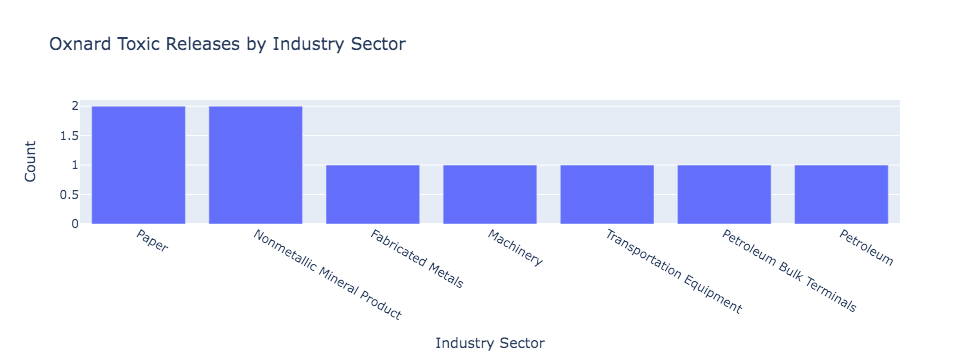

In [9]:
fig = px.bar(facility_by_sector_type_ox.head(20),
       x='industry_sector',
       y='count',
       title='Oxnard Toxic Releases by Industry Sector',
        labels={
            'industry_sector':'Industry Sector',
            'count':'Count'
        })

fig.show()


## Chart Difference in Waste Release per Facility in Oxnard, CA

In [10]:
newdata=dfox.drop(['Longitude','Latitude', 'Address', 'Industry Sector', 'Releases (lb)', 'geometry'], axis = 1)
#name new dataframe with name as index and not as"0,1,2.."
dfoxx=newdata.set_index("Name")
dfoxx
#Releases (lb) Mean labels
#10,001-100,000lb=55,000.5lb
#101-10,000lb=5,050.5lb
#>0-100lb=50lb
#0lb=0lb

Releases (lb) Mean
Name                                                        
New-Indy Oxnard LLC                                  55000.5
Aluminum Precision Products INC                       5050.5
Cemex Oxnard Plant                                       0.0
Parker Hannifin Corp                                 55000.5
PTI Technologies Inc                                  5050.5
The Procter & Gamble Paper Product CO                 5050.5
Southern Counties Oil CO LP DBA SC Fuels              5050.5
Associated Ready Mixed Concrete Inc                      0.0
Vulcan Materials-Saticoy                                50.0

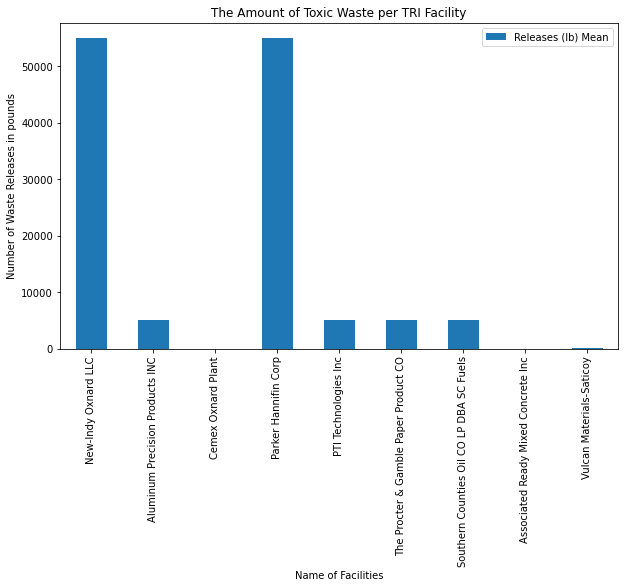

In [11]:
#querying data
#newdata=dfoxx.loc[['Name'], ['Releases(lb)']]
#plot dataframe with edits as bar graph
#dfoxx['Releases (lb) Mean']=dfoxx['Releases (lb) Mean'].astype(float)
dfoxx.plot(figsize=(10, 6), kind='bar')
#customize graph features to add x and y labels, title, and position graph legend
plt.ylabel('Number of Waste Releases in pounds')
plt.xlabel('Name of Facilities')
plt.title('The Amount of Toxic Waste per TRI Facility')
plt.legend(loc='upper right')
#display customized graph
plt.show()
#this bar graph shows that surveyed White people own  more units than surveyed Black and Asian people

## Toxic Releases in Los Angeles, categorized by Industry Sector 

In [12]:
ox_toxic.info

<bound method DataFrame.info of     Longitude   Latitude                                      Name  \
0 -119.183020  34.140350                       New-Indy Oxnard LLC   
1 -119.168445  34.141707           Aluminum Precision Products INC   
2 -119.168110  34.196130                        Cemex Oxnard Plant   
3 -119.147180  34.198100                      Parker Hannifin Corp   
4 -119.130352  34.205928                      PTI Technologies Inc   
5 -119.140427  34.209468     The Procter & Gamble Paper Product CO   
6 -119.163291  34.249140  Southern Counties Oil CO LP DBA SC Fuels   
7 -119.129346  34.199354       Associated Ready Mixed Concrete Inc   
8 -119.143053  34.270536                  Vulcan Materials-Saticoy   

                                        Address              Industry Sector  \
0           5936 Perkins Road, Oxnard, CA 93033                        Paper   
1      1001 MC Wane Bouvelard, Oxnard, CA 93033            Fabricated Metals   
2             548 Diaz Aven

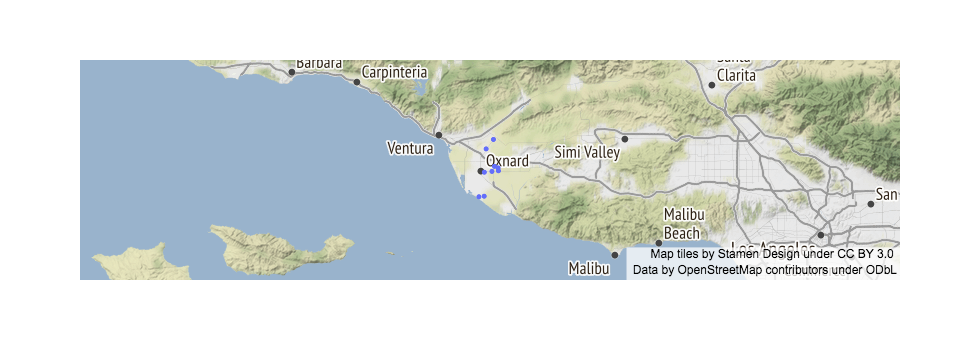

In [69]:
fig = px.scatter_mapbox(ox_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-terrain")
fig.show()

## Interactive Map of Toxic Releases in Oxnard

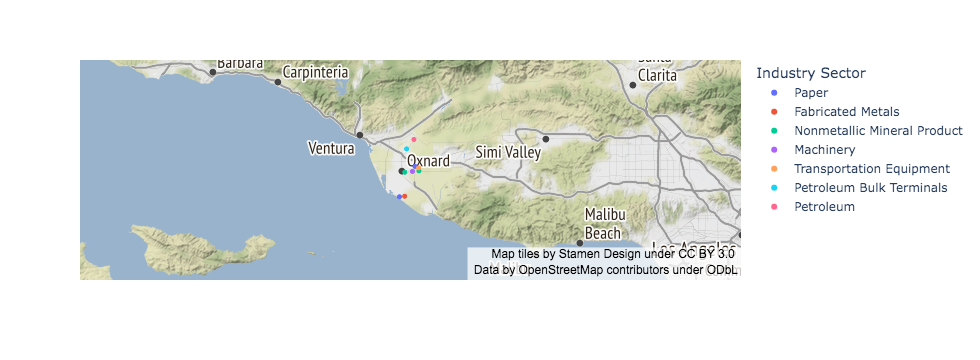

In [14]:
fig = px.scatter_mapbox(ox_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        color="Industry Sector",
                        labels={'Industry Sector':'Industry Sector'},
                        mapbox_style="stamen-terrain"
                       )
fig.show()


The map help us visualize the location and spread/clustering of toxic releases and the bar graph lets us take a closer look at the most prominent types of toxic industry in this city.

In [15]:
la_toxic = gpd.read_file("toxic_la_data.csv",GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

Here something was off with my csv file and I had to look up what code could fix a "recursion," error 

In [16]:
la_toxic.shape

(110, 10)

In [17]:
la_toxic['Latitude'] = la_toxic['Latitude'].astype(float)
la_toxic['Longitude'] = la_toxic['Longitude'].astype(float)
#we transform our latititudes and longitudes into floats

In [18]:
# show me distinct value of charges
facility_by_sector_type = la_toxic.industry_sector.value_counts().reset_index()
facility_by_sector_type

index  industry_sector
0             Fabricated Metals               47
1                     Chemicals               25
2   Nonmetallic Mineral Product               16
3                          Food                5
4                Primary Metals                4
5               Hazardous Waste                3
6                      Textiles                2
7   Miscellaneous Manufacturing                2
8          Chemical Wholesalers                2
9                         Paper                2
10     Petroleum Bulk Terminals                1
11          Plastics and Rubber                1

In [19]:
# rename the columns
facility_by_sector_type.columns=['industry_sector','count']
facility_by_sector_type

industry_sector  count
0             Fabricated Metals     47
1                     Chemicals     25
2   Nonmetallic Mineral Product     16
3                          Food      5
4                Primary Metals      4
5               Hazardous Waste      3
6                      Textiles      2
7   Miscellaneous Manufacturing      2
8          Chemical Wholesalers      2
9                         Paper      2
10     Petroleum Bulk Terminals      1
11          Plastics and Rubber      1

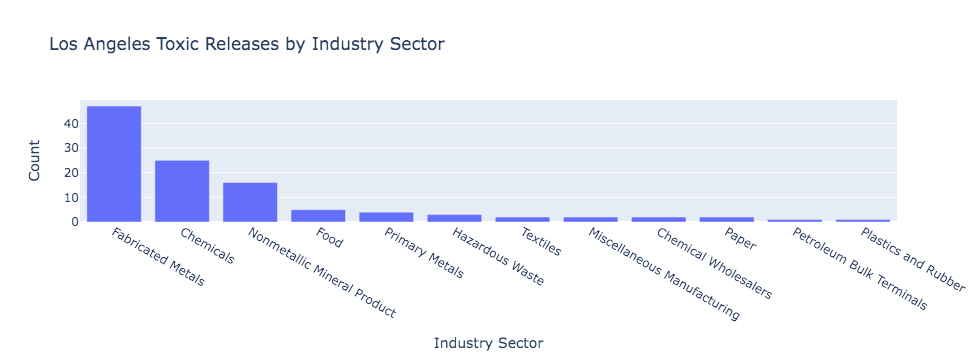

In [20]:
fig = px.bar(facility_by_sector_type.head(20),
       x='industry_sector',
       y='count',
       title='Los Angeles Toxic Releases by Industry Sector',
        labels={
            'industry_sector':'Industry Sector',
            'count':'Count'
        })

fig.show()

## Interactive Map of Toxic Releases in Los Angeles 

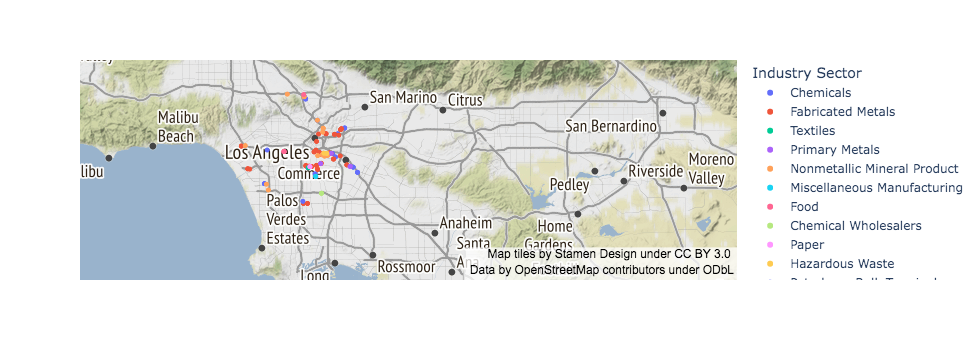

In [21]:
fig = px.scatter_mapbox(la_toxic,
                        lat='Latitude',
                        lon='Longitude',
                        color="industry_sector",
                        labels={'industry_sector':'Industry Sector'},
                        mapbox_style="stamen-terrain"
                       )
fig.show()
#using a shortened data set that inccludes just Los Angeles locations we upload our data of Oxnard toxic releases.
#I had to manually add Industry sector types onto the excel sheet because the downloaded file did not include it 

The map of toxic releases in Los Angeles helps us see where most of the industry clusters, we can see that there is a lot more toxic releases in East LA than West LA. The bar graph allows us to further examine the most prominent types of industry sectors and toxic releases. 

## Mapping the Racial Population Around the TRI Facility with the Largest Releases

In [22]:
#loading geojson file
gdfox=gpd.read_file('oxnardcensus.geojson')

<AxesSubplot:>

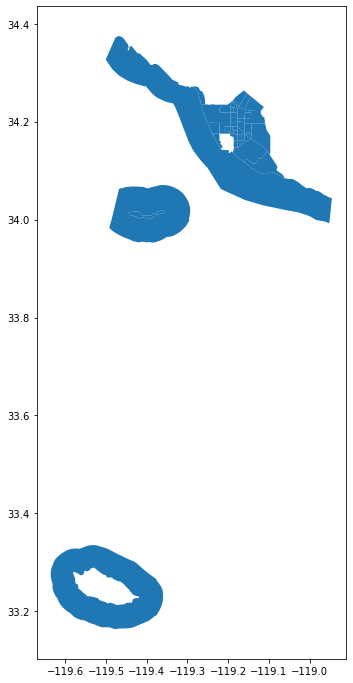

In [23]:
#plot data
gdfox.plot(figsize=(12,12))

In [24]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [25]:
# redefine gdf with only columns to keep
gdfox = gdfox[columns_to_keep]

In [26]:
#rename column headers with race
gdfox.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [27]:
gdfox

geoid                             name    Total  \
0   14000US06111002500     Census Tract 25, Ventura, CA   5374.0   
1   14000US06111002901  Census Tract 29.01, Ventura, CA   5665.0   
2   14000US06111002905  Census Tract 29.05, Ventura, CA   5433.0   
3   14000US06111003010  Census Tract 30.10, Ventura, CA   3226.0   
4   14000US06111003011  Census Tract 30.11, Ventura, CA   5539.0   
5   14000US06111003012  Census Tract 30.12, Ventura, CA    675.0   
6   14000US06111003013  Census Tract 30.13, Ventura, CA   5509.0   
7   14000US06111003100     Census Tract 31, Ventura, CA  14299.0   
8   14000US06111003201  Census Tract 32.01, Ventura, CA   4230.0   
9   14000US06111003300     Census Tract 33, Ventura, CA   8956.0   
10  14000US06111003605  Census Tract 36.05, Ventura, CA   9631.0   
11  14000US06111003608  Census Tract 36.08, Ventura, CA   4024.0   
12  14000US06111003609  Census Tract 36.09, Ventura, CA   5863.0   
13  14000US06111003612  Census Tract 36.12, Ventura, CA   4962.0   
14  14000US06111003700     Census Tract 37, Ventura, CA   6687.0   
15  14000US06111003801  Census Tract 38.01, Ventura, CA   5033.0   
16  14000US06111003802  Census Tract 38.02, Ventura, CA   2849.0   
17  14000US06111003900     Census Tract 39, Ventura, CA   6984.0   
18  14000US06111004000     Census Tract 40, Ventura, CA   7179.0   
19  14000US06111004101  Census Tract 41.01, Ventura, CA   6947.0   
20  14000US06111004304  Census Tract 43.04, Ventura, CA   5978.0   
21  14000US06111004503  Census Tract 45.03, Ventura, CA   5112.0   
22  14000US06111004504  Census Tract 45.04, Ventura, CA   5777.0   
23  14000US06111004505  Census Tract 45.05, Ventura, CA   2208.0   
24  14000US06111004506  Census Tract 45.06, Ventura, CA   7788.0   
25  14000US06111004600     Census Tract 46, Ventura, CA   2035.0   
26  14000US06111004704  Census Tract 47.04, Ventura, CA   1372.0   
27  14000US06111004710  Census Tract 47.10, Ventura, CA   5707.0   
28  14000US06111004711  Census Tract 47.11, Ventura, CA   3552.0   
29  14000US06111004715  Census Tract 47.15, Ventura, CA   5417.0   
30  14000US06111004716  Census Tract 47.16, Ventura, CA   5066.0   
31  14000US06111004717  Census Tract 47.17, Ventura, CA   3951.0   
32  14000US06111004901  Census Tract 49.01, Ventura, CA   7229.0   
33  14000US06111004902  Census Tract 49.02, Ventura, CA   5072.0   
34  14000US06111005002  Census Tract 50.02, Ventura, CA   3339.0   
35  14000US06111005003  Census Tract 50.03, Ventura, CA   7261.0   
36  14000US06111005004  Census Tract 50.04, Ventura, CA   9833.0   
37  14000US06111008600     Census Tract 86, Ventura, CA   7920.0   
38  14000US06111008700     Census Tract 87, Ventura, CA   6029.0   
39  14000US06111008800     Census Tract 88, Ventura, CA   5582.0   
40  14000US06111008900     Census Tract 89, Ventura, CA   3385.0   
41  14000US06111009100     Census Tract 91, Ventura, CA   4870.0   
42  14000US06111990100   Census Tract 9901, Ventura, CA      0.0   

    Non Hispanic  Non Hispanic White  Non Hispanic Black  \
0         4419.0              4014.0                44.0   
1         2747.0              1538.0               196.0   
2         2339.0              1110.0               450.0   
3          805.0               445.0                82.0   
4         1004.0               612.0                65.0   
5           13.0                13.0                 0.0   
6         1934.0              1188.0               230.0   
7         5059.0              2093.0               319.0   
8          103.0                32.0                 7.0   
9         1942.0              1523.0                88.0   
10        4653.0              2765.0               445.0   
11        1366.0               771.0                68.0   
12        5347.0              5112.0                 0.0   
13        4040.0              3701.0                75.0   
14         724.0               228.0               410.0   
15         348.0               107.0                35.0   
16  

In [28]:
#add percent columns for each race
gdfox['Percent Non Hispanic White'] = gdfox['Non Hispanic White']/gdfox['Total']*100
gdfox['Percent Non Hispanic Black'] = gdfox['Non Hispanic Black']/gdfox['Total']*100
gdfox['Percent Non Hispanic American Indian and Alaska Native'] = gdfox['Non Hispanic American Indian and Alaska Native']/gdfox['Total']*100
gdfox['Percent Non Hispanic Asian'] = gdfox['Non Hispanic Asian']/gdfox['Total']*100
gdfox['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdfox['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdfox['Total']*100
gdfox['Percent Non Hispanic Some other race'] = gdfox['Non Hispanic Some other race']/gdfox['Total']*100
gdfox['Percent Non Hispanic Two or more races'] = gdfox['Non Hispanic Two or more races']/gdfox['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Mapping the Racial Population Around the TRI Facility with the Largest Releases

In [29]:
#Found census tract that Parker Hannifan Facility is in
#Census Tracts: 
#STATE CODE: 06
#GEOID: 06111004902
#CENTLAT: +34.2084355
#COUNTY CODE: 111
#AREAWATER: 0
#NAME: Census Tract 49.02
#CENTLON: -119.1342637
#TRACT CODE: 004902
#AREALAND: 10177889
#source: https://geocoding.geo.census.gov/geocoder/geographies/address?street=2340+Eastman+Ave&city=Oxnard&state=CA&zip=93030&benchmark=4&vintage=4

In [30]:
#locking census tract 49.02/geoid 06111004902 on index 33 in onxard census data table
parker=gdfox.query('index==33')


In [31]:
parker

geoid                             name   Total  Non Hispanic  \
33  14000US06111004902  Census Tract 49.02, Ventura, CA  5072.0         106.0   

    Non Hispanic White  Non Hispanic Black  \
33                94.0                 0.0   

    Non Hispanic American Indian and Alaska Native  Non Hispanic Asian  \
33                                             0.0                12.0   

    Non Hispanic Native Hawaiian and Other Pacific Islander  \
33                                                0.0         

    Non Hispanic Some other race  Non Hispanic Two or more races  Hispanic  \
33                           0.0                             0.0    4966.0   

                                             geometry  \
33  MULTIPOLYGON (((-119.15976 34.19728, -119.1597...   

    Percent Non Hispanic White  Percent Non Hispanic Black  \
33                    1.853312                         0.0   

    Percent Non Hispanic American Indian and Alaska Native  \
33                                                0.0        

    Percent Non Hispanic Asian  \
33                    0.236593   

    Percent Non Hispanic Native Hawaiian and Other Pacific Islander  \
33                                                0.0                 

    Percent Non Hispanic Some other race  \
33                                   0.0   

    Percent Non Hispanic Two or more races  
33                                     0.0

<AxesSubplot:>

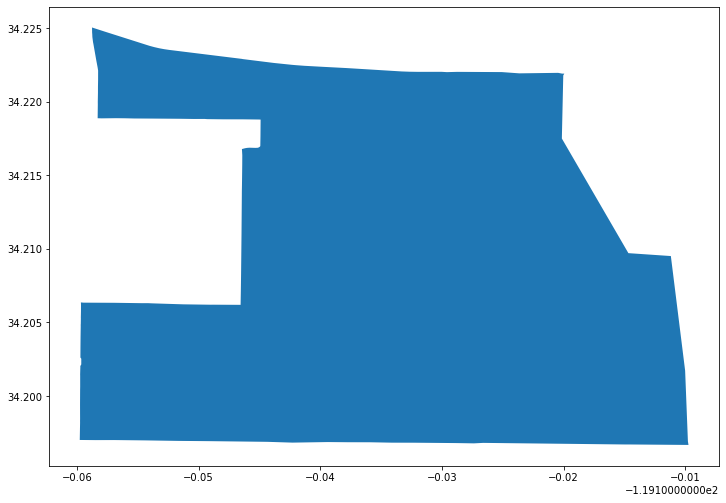

In [32]:
#plot data
parker.plot(figsize=(12,12))

In [33]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [34]:
#looking at Oxnard city and driving distance between toxic facilties and nearest residential areas
address = '2340, Eastman Avenue, Oxnard, Ventura County, California, 93030, United States'
network_type = 'drive'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 1609 # googled avergae mph per minute and converted to meters 

In [35]:
%%time
# see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 2000)

CPU times: user 1.24 s, sys: 35.8 ms, total: 1.27 s
Wall time: 1.28 s


In [36]:
#what is graph is this?
type(G)

networkx.classes.multidigraph.MultiDiGraph

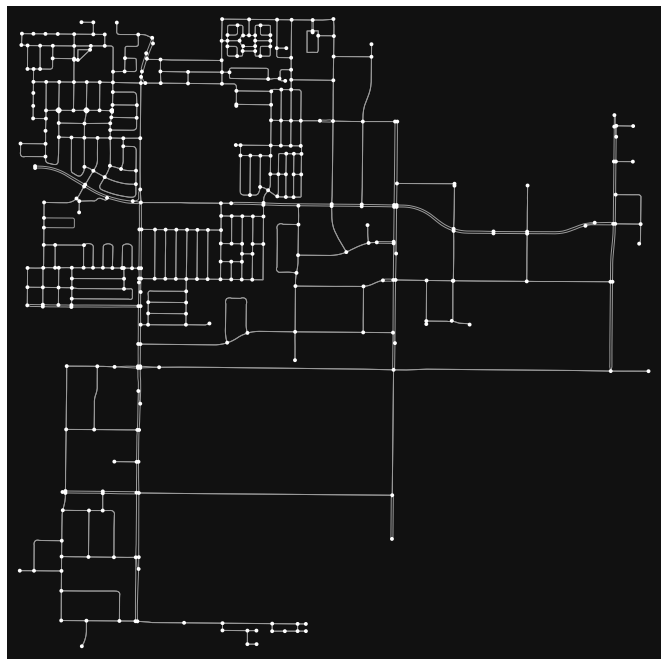

In [37]:
# plot using oxmnx
fig, ax = ox.plot_graph(G,figsize=(12,12))
#shows grid of oxnard

In [38]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')

In [39]:
# convert nodes and edges to geodataframes
gdfpa_nodes, gdfpa_edges = ox.graph_to_gdfs(G)

In [40]:
gdfpa_nodes.sample(10)

y             x  street_count         lon        lat  \
osmid                                                                         
7432299931  4.054560e+06 -1.326483e+07             4 -119.159970  34.191614   
7432299893  4.055005e+06 -1.326480e+07             3 -119.159722  34.194922   
95522891    4.056575e+06 -1.326529e+07             3 -119.164102  34.206586   
3216703754  4.057566e+06 -1.326557e+07             3 -119.166605  34.213946   
95501809    4.057164e+06 -1.326310e+07             4 -119.144425  34.210959   
95642704    4.057153e+06 -1.326542e+07             3 -119.165324  34.210875   
7180138182  4.056327e+06 -1.326240e+07             4 -119.138184  34.204741   
95505714    4.056230e+06 -1.326410e+07             3 -119.153446  34.204019   
95417231    4.053836e+06 -1.326540e+07             3 -119.165128  34.186232   
6081088976  4.056690e+06 -1.326284e+07             3 -119.142078  34.207439   

           highway                           geometry  
osmid                                                  
7432299931     NaN  POINT (-13264827.228 4054560.216)  
7432299893     NaN  POINT (-13264799.520 4055005.469)  
95522891       NaN  POINT (-13265287.155 4056575.325)  
3216703754     NaN  POINT (-13265565.833 4057566.012)  
95501809       NaN  POINT (-13263096.722 4057163.963)  
95642704       NaN  POINT (-13265423.199 4057152.628)  
7180138182     NaN  POINT (-13262402.010 4056327.011)  
95505714       NaN  POINT (-13264100.935 4056229.802)  
95417231       NaN  POINT (-13265401.369 4053835.930)  
6081088976     NaN  POINT (-13262835.455 4056690.170)

In [41]:
gdfpa_edges.head()

osmid                             name  \
u        v        key                                                          
95173394 95536640 0    [10738055, 10714703]  [Beacon Place, Universe Circle]   
         95536637 0                10739932                   Pacific Avenue   
         95631603 0                10739932                   Pacific Avenue   
95536640 95173394 0    [10714703, 10738055]  [Beacon Place, Universe Circle]   
         95536641 0               743170077                   Emerson Avenue   

                           highway  oneway   length  \
u        v        key                                 
95173394 95536640 0    residential   False  548.837   
         95536637 0       tertiary   False  187.589   
         95631603 0       tertiary   False  125.875   
95536640 95173394 0    residential   False  548.837   
         95536641 0       tertiary   False  101.574   

                                                                geometry  \
u        v        key                                                      
95173394 95536640 0    LINESTRING (-13265403.150 4053573.653, -132653...   
         95536637 0    LINESTRING (-13265403.150 4053573.653, -132654...   
         95631603 0    LINESTRING (-13265403.150 4053573.653, -132654...   
95536640 95173394 0    LINESTRING (-13264958.830 4053343.275, -132649...   
         95536641 0    LINESTRING (-13264958.830 4053343.275, -132649...   

                      lanes  ref maxspeed junction  
u        v        key                               
95173394 95536640 0     NaN  NaN      NaN      NaN  
         95536637 0     NaN  NaN      NaN      NaN  
         95631603 0     NaN  NaN      NaN      NaN  
95536640 95173394 0     NaN  NaN      NaN      NaN  
         95536641 0     NaN  NaN      NaN      NaN

<AxesSubplot:>

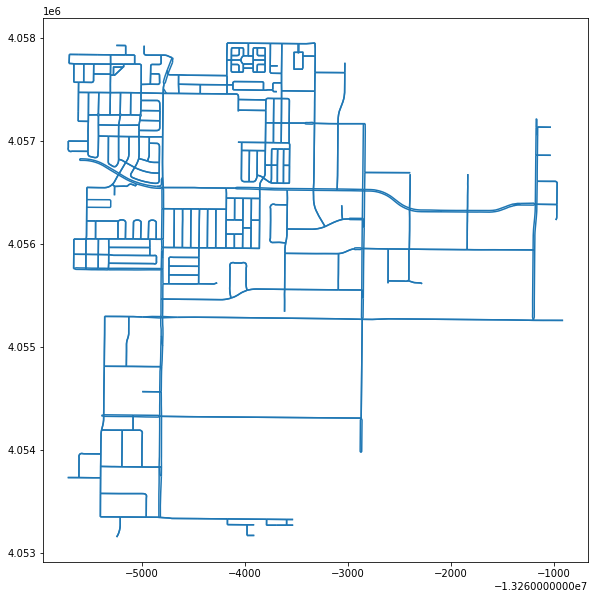

In [42]:

#query only residential roads
#gdfpa_edges=gdfpa_edges.query('highway==residential')
#gdfpa_edges.loc[gdfpa_edges['highway'] == residential]
#Select rows whose column value contains a string

gdfpa_edges.loc[gdfpa_edges['highway'].str.contains('residential')]
gdfpa_edges.plot(figsize=(10,10))

In [43]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdfpa_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13265721.190172315
4053149.7311939765
-13260910.874600055
4057948.5014720145


In [44]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13263316.032386184
4055549.1163329957


In [45]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 95565605


In [46]:
# what is this record?
gdfpa_nodes.loc[[center_node]]

y             x  street_count         lon        lat  \
osmid                                                                       
95565605  4.055551e+06 -1.326309e+07             3 -119.144398  34.198973   

         highway                           geometry  
osmid                                                
95565605     NaN  POINT (-13263093.716 4055550.633)

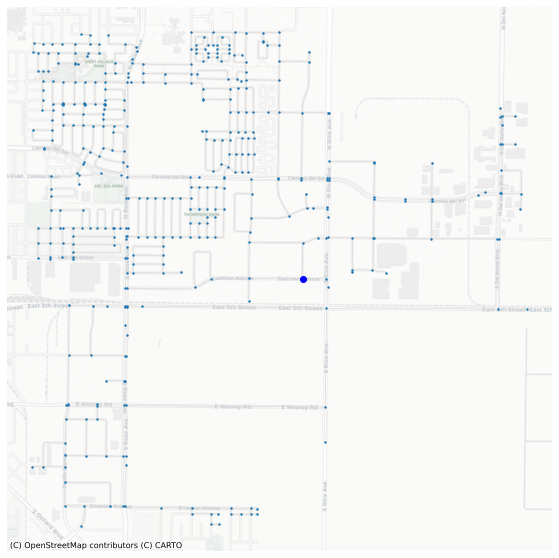

In [47]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdfpa_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdfpa_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdfpa_nodes.loc[[center_node]].plot(ax=ax,
                                  color='b', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [48]:
# a quick look at the data
gdfpa_edges[['osmid','name','highway','length']].sample(5)

osmid  \
u        v        key                         
95598637 95525348 0    [10738115, 10734167]   
95416548 95549698 0    [10739137, 10740609]   
95446801 95665374 0                10741881   
95527009 95505717 0    [10734289, 10743595]   
95494360 95412874 0                10737855   

                                                      name      highway  \
u        v        key                                                     
95598637 95525348 0              [Paseo Isla, Paseo Lindo]  residential   
95416548 95549698 0        [Del Rey Place, Festivo Street]  residential   
95446801 95665374 0                         Almanor Street  residential   
95527009 95505717 0    [Santa Lucia Avenue, Kohala Street]  residential   
95494360 95412874 0                         Williams Drive  residential   

                        length  
u        v        key           
95598637 95525348 0    175.641  
95416548 95549698 0    302.642  
95446801 95665374 0     75.768  
95527009 95505717 0    294.148  
95494360 95412874 0    137.025

In [49]:
# create a new column, calculate the time it takes to travel that edge
gdfpa_edges['drive_time'] = gdfpa_edges['length']/meters_per_minute

In [50]:
gdfpa_edges[['osmid','name','highway','length','drive_time']].sample(10)

osmid  \
u          v          key                         
95569525   2005492989 0               723726873   
95588539   3216703662 0               315547683   
95536637   95536639   0               743170077   
95441061   95565605   0                10739080   
95494363   95518771   0                10742687   
95536640   95173394   0    [10714703, 10738055]   
95520009   95421425   0                10733769   
95631603   95173394   0                10739932   
3216701738 95527252   0    [10734416, 10740587]   
95478409   95494360   0                10737855   

                                                      name      highway  \
u          v          key                                                 
95569525   2005492989 0               North Lombard Street  residential   
95588539   3216703662 0                                NaN  residential   
95536637   95536639   0                     Emerson Avenue     tertiary   
95441061   95565605   0                    Candelaria Road  residential   
95494363   95518771   0                         Flora Lane  residential   
95536640   95173394   0    [Beacon Place, Universe Circle]  residential   
95520009   95421425   0                     Cordova Street  residential   
95631603   95173394   0                     Pacific Avenue     tertiary   
3216701738 95527252   0         [Nina Drive, Olivia Drive]  residential   
95478409   95494360   0                     Williams Drive  residential   

                            length  drive_time  
u          v          key                       
95569525   2005492989 0     75.825    0.047126  
95588539   3216703662 0     10.085    0.006268  
95536637   95536639   0    159.435    0.099089  
95441061   95565605   0    290.774    0.180717  
95494363   95518771   0     36.029    0.022392  
95536640   95173394   0    548.837    0.341104  
95520009   95421425   0    311.145    0.193378  
95631603   95173394   0    125.875    0.078232  
3216701738 95527252   0    278.353    0.172998  
95478409   95494360   0    123.126    0.076523

In [51]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='YlOrRd', 
                                start=0, 
                                return_hex=True)

In [52]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)

In [53]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#ffffcc'), (15, '#febf5a'), (10, '#f43d25'), (5, '#800026')]

In [54]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #ffffcc
The color for 15 minutes is #febf5a
The color for 10 minutes is #f43d25
The color for 5 minutes is #800026


In [55]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdfpa_nodes.loc[node,'time'] = str(time) + ' mins'
        gdfpa_nodes.loc[node,'color'] = color

There are 389 nodes within 20 minutes 
There are 300 nodes within 15 minutes 
There are 165 nodes within 10 minutes 
There are 36 nodes within 5 minutes 


In [56]:
# spot check
gdfpa_nodes[['highway','time','color']].sample(20)

highway     time    color
osmid                                        
95524476                NaN  15 mins  #febf5a
95499230                NaN  15 mins  #febf5a
95485848                NaN  15 mins  #febf5a
5279120140              NaN   5 mins  #800026
95656680                NaN  20 mins  #ffffcc
95614833                NaN  20 mins  #ffffcc
95440966                NaN  20 mins  #ffffcc
95536641    traffic_signals  10 mins  #f43d25
95469442                NaN  20 mins  #ffffcc
95585754                NaN  20 mins  #ffffcc
95644350                NaN  15 mins  #febf5a
95463678                NaN  15 mins  #febf5a
95575730                NaN  20 mins  #ffffcc
95524477                NaN  15 mins  #febf5a
95463669                NaN  15 mins  #febf5a
95536654                NaN  15 mins  #febf5a
7432299926              NaN  10 mins  #f43d25
3216703684              NaN  20 mins  #ffffcc
95424397                NaN  10 mins  #f43d25
95441072                NaN   5 mins  #800026

In [57]:
# the NaN values then need to be populated with a valid color
gdfpa_nodes['color'].fillna('#cccccc', inplace=True)
# another spot check: are all values in the color column populated?
gdfpa_nodes.sample(10)

y             x  street_count         lon        lat  \
osmid                                                                         
3216703684  4.057249e+06 -1.326520e+07             3 -119.163338  34.211594   
95441057    4.055905e+06 -1.326361e+07             3 -119.149055  34.201606   
95485851    4.056352e+06 -1.326554e+07             3 -119.166343  34.204929   
95468871    4.057824e+06 -1.326397e+07             3 -119.152246  34.215859   
374104279   4.055254e+06 -1.326091e+07             1 -119.124789  34.196768   
95569525    4.057561e+06 -1.326365e+07             3 -119.149353  34.213905   
95478411    4.057453e+06 -1.326417e+07             3 -119.154107  34.213107   
7180138173  4.056539e+06 -1.326410e+07             3 -119.153472  34.206313   
95557175    4.056045e+06 -1.326542e+07             3 -119.165323  34.202647   
95440966    4.057456e+06 -1.326443e+07             3 -119.156438  34.213125   

           highway                           geometry     time    color  
osmid                                                                    
3216703684     NaN  POINT (-13265202.141 4057249.400)  20 mins  #ffffcc  
95441057       NaN  POINT (-13263612.131 4055905.058)   5 mins  #800026  
95485851       NaN  POINT (-13265536.600 4056352.275)  15 mins  #febf5a  
95468871       NaN  POINT (-13263967.352 4057823.575)  20 mins  #ffffcc  
374104279      NaN  POINT (-13260910.875 4055253.875)   5 mins  #800026  
95569525       NaN  POINT (-13263645.293 4057560.587)  15 mins  #febf5a  
95478411      stop  POINT (-13264174.539 4057453.083)  15 mins  #febf5a  
7180138173     NaN  POINT (-13264103.807 4056538.619)  10 mins  #f43d25  
95557175       NaN  POINT (-13265423.077 4056045.133)  15 mins  #febf5a  
95440966       NaN  POINT (-13264433.970 4057455.560)  20 mins  #ffffcc

<AxesSubplot:>

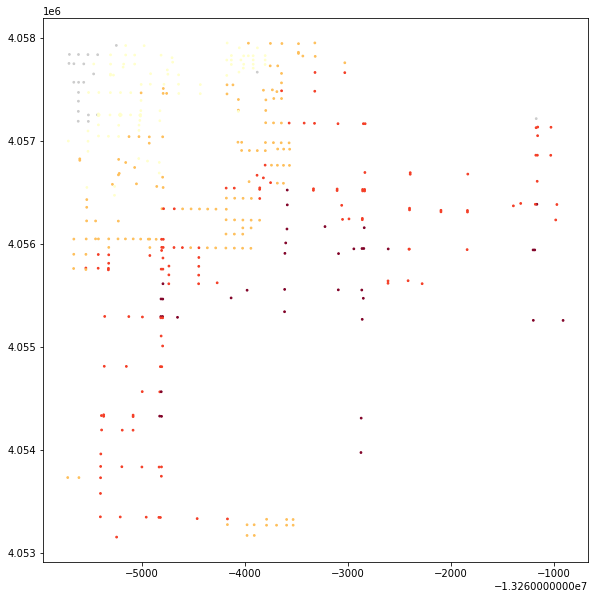

In [58]:

#map it
gdfpa_nodes.plot(figsize=(10,10),
               color=gdfpa_nodes['color'],
               markersize=3)




In [59]:
# show only the points within 5 minutes
gdfpa_nodes[gdfpa_nodes['time']=='5 mins']

y             x  street_count         lon        lat  \
osmid                                                                         
95427040    4.054324e+06 -1.326483e+07             5 -119.159980  34.189861   
897648871   4.054322e+06 -1.326481e+07             4 -119.159817  34.189846   
95441057    4.055905e+06 -1.326361e+07             3 -119.149055  34.201606   
95441061    4.055903e+06 -1.326309e+07             3 -119.144378  34.201588   
95569532    4.056006e+06 -1.326360e+07             3 -119.148984  34.202357   
95565607    4.055555e+06 -1.326361e+07             4 -119.149077  34.199006   
95441072    4.055949e+06 -1.326294e+07             2 -119.143042  34.201931   
95565605    4.055551e+06 -1.326309e+07             3 -119.144398  34.198973   
4723364108  4.055952e+06 -1.326286e+07             4 -119.142329  34.201953   
95441078    4.055948e+06 -1.326261e+07             3 -119.140044  34.201925   
4723364109  4.055952e+06 -1.326285e+07             4 -119.142173  34.201956   
5279120140  4.055938e+06 -1.326120e+07             4 -119.127406  34.201853   
95441090    4.055938e+06 -1.326119e+07             4 -119.127264  34.201852   
95505830    4.056382e+06 -1.326117e+07             4 -119.127077  34.205146   
95449269    4.055264e+06 -1.326286e+07             5 -119.142311  34.196846   
374104337   4.055284e+06 -1.326466e+07             3 -119.158424  34.196991   
95449272    4.055469e+06 -1.326285e+07             3 -119.142216  34.198364   
1969327128  4.055255e+06 -1.326120e+07             4 -119.127386  34.196774   
6413662985  4.054305e+06 -1.326287e+07             3 -119.142402  34.189718   
4723364126  4.055549e+06 -1.326287e+07             4 -119.142350  34.198960   
7432299924  4.055610e+06 -1.326480e+07             3 -119.159693  34.199413   
95505768    4.056520e+06 -1.326359e+07             3 -119.148853  34.206174   
95569526    4.056376e+06 -1.326359e+07             3 -119.148848  34.205103   
95533861    4.056165e+06 -1.326322e+07             3 -119.145559  34.203537   
95531958    4.055547e+06 -1.326398e+07             3 -119.152354  34.198946   
95565617    4.055472e+06 -1.326413e+07             3 -119.153748  34.198390   
95569527    4.056142e+06 -1.326359e+07             3 -119.148876  34.203363   
95562620    4.056154e+06 -1.326284e+07             3 -119.142136  34.203455   
897648486   4.055338e+06 -1.326362e+07             1 -119.149086  34.197394   
7432299908  4.055461e+06 -1.326480e+07             4 -119.159710  34.198308   
95565624    4.055462e+06 -1.326482e+07             3 -119.159863  34.198316   
2196325751  4.055291e+06 -1.326482e+07             4 -119.159880  34.197046   
374104279   4.055254e+06 -1.326091e+07             1 -119.124789  34.196768   
7432299900  4.055292e+06 -1.326480e+07             4 -119.159725  34.197048   
7432299886  4.054561e+06 -1.326481e+07             3 -119.159843  34.191621   
6413662989  4.053971e+06 -1.326287e+07             2 -119.142422  34.187234   

                    highway                           geometry    time  \
osmid                                                                    
95427040    traffic_signals  POINT (-13264828.252 4054324.354)  5 mins   
897648871   traffic_signals  POINT (-13264810.196 4054322.321)  5 mins   
95441057                NaN  POINT (-13263612.131 4055905.058)  5 mins   
95441061                NaN  POINT (-13263091.468 4055902.582)  5 mins   
95569532                NaN  POINT (-13263604.272 4056006.100)  5 mins   
95565607                NaN  POINT (-13263614.580 4055555.074)  5 mins   
95441072                NaN  POINT (-13262942.767 4055948.708)  5 mins   
95565605                NaN  POINT (-13263093.716 4055550.633)  5 mins   
4723364108  traffic_signals  POINT (-13262863.352 4055951.723)  5 mins   
95441078                NaN  POINT (-13262609.065 4055947.941)  5 mins   
4723364109  traffic_signals  POINT (-13262846.030 4055952.113)  5 mins   
5279120140              NaN  POINT (-13261202.187 4055938.

In [60]:
# put it in a variable
gdfpa_5 = gdfpa_nodes[gdfpa_nodes['time']=='5 mins']

<AxesSubplot:>

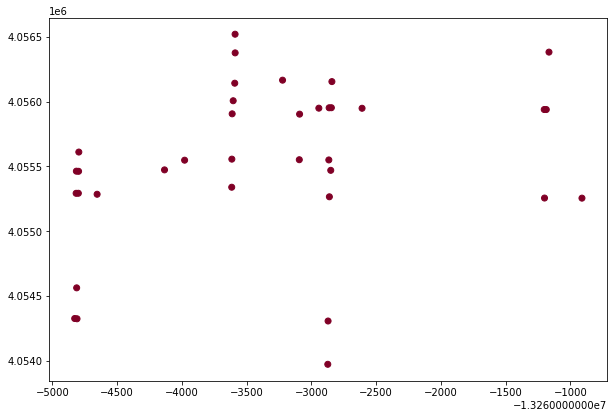

In [61]:
# plot it
gdfpa_5.plot(figsize=(10,10),color=gdfpa_5.color)

In [62]:
# dissolve the nodes by time
isochrones = gdfpa_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13265544.983 4055762.738, -132654...  4.053574e+06   
15 mins  MULTIPOINT (-13265721.190 4053727.870, -132656...  4.056739e+06   
20 mins  MULTIPOINT (-13265715.402 4056995.566, -132655...  4.056685e+06   
5 mins   MULTIPOINT (-13264828.252 4054324.354, -132648...  4.054324e+06   

                    x  street_count         lon        lat          highway  \
time                                                                          
10 mins -1.326540e+07             3 -119.165144  34.184283  traffic_signals   
15 mins -1.326507e+07             4 -119.162163  34.207801             stop   
20 mins -1.326483e+07             3 -119.160021  34.207401             stop   
5 mins  -1.326483e+07             5 -119.159980  34.189861  traffic_signals   

           color  
time              
10 mins  #f43d25  
15 mins  #febf5a  
20 mins  #ffffcc  
5 mins   #800026

In [63]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  10 mins  POLYGON ((-13265246.413 4053149.731, -13265404...
1  15 mins  POLYGON ((-13263979.819 4053165.650, -13265721...
2  20 mins  POLYGON ((-13265267.151 4056468.827, -13265535...
3   5 mins  POLYGON ((-13262873.738 4053970.785, -13264828...

In [64]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

In [65]:
isochrones.head()

time                                           geometry
0  10 mins  POLYGON ((-13265246.413 4053149.731, -13265404...
1  15 mins  POLYGON ((-13263979.819 4053165.650, -13265721...
2  20 mins  POLYGON ((-13265267.151 4056468.827, -13265535...
3   5 mins  POLYGON ((-13262873.738 4053970.785, -13264828...

<AxesSubplot:>

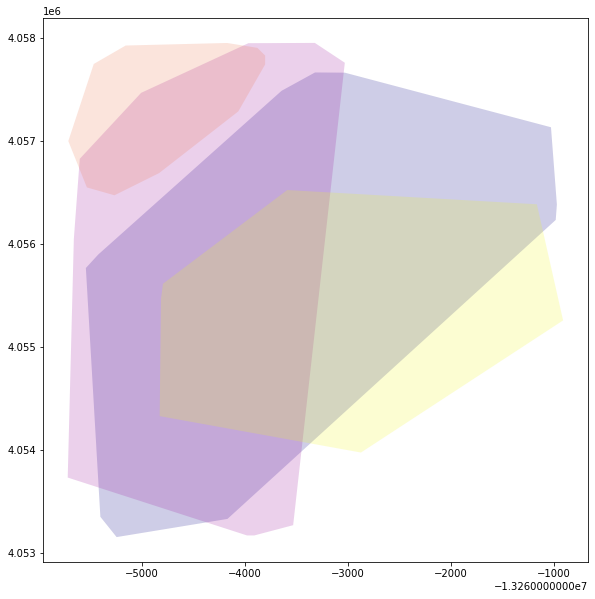

In [66]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

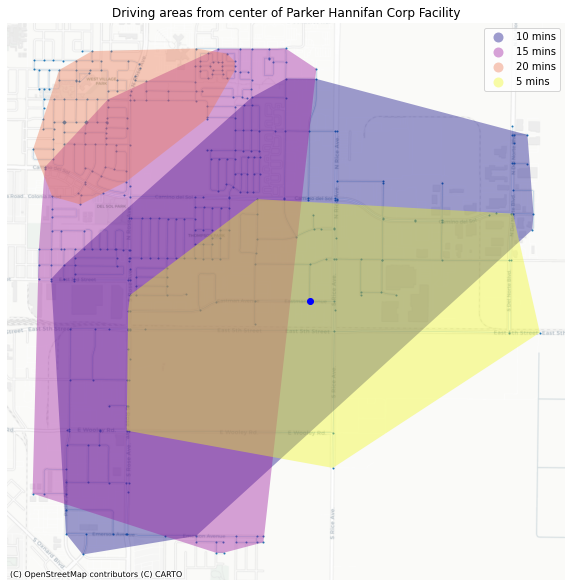

In [67]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdfpa_nodes.loc[[center_node]].plot(ax=ax,color='b', zorder=30)

# add all nodes
gdfpa_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdfpa_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Driving areas from center of Parker Hannifan Corp Facility')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [68]:
#mapped parker hannifan and nodes and edges within driving distance


As we look at next steps we are looking to continue mapping the proximty from the most polluting facilties to residential areas in Oxnard. 

Data research and sourcing by Antonia Izuogu and Lupe Velez.
Introduction, Interactive Maps and Sectory Type bar graphs by Lupe Velez 
Weight Bar Graphs, Isochrone Map and Next Steps by Antonia Izuogu 

